In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [2]:
df = pd.read_csv('data/Bitcoin.csv')
df.head()

,id,CoinDate,CoinOpen,CoinHigh,CoinLow,CoinClose,CoinVolume,CoinCap
0,0,2022/12/03,17090.10,17116.04,16888.14,16908.24,1.621778e+10,3.250372e+11
1,1,2022/12/02,16968.68,17088.66,16877.88,17088.66,1.953971e+10,3.284917e+11
2,2,2022/12/01,17168.00,17197.50,16888.39,16967.13,2.289539e+10,3.261421e+11
3,3,2022/11/30,16445.48,17190.94,16445.48,17168.57,2.952358e+10,3.299976e+11
4,4,2022/11/29,16217.64,16522.26,16139.40,16444.98,2.358169e+10,3.160749e+11


In [11]:
df=df.sort_values(by='id', ascending=False)
df.head()

,id,CoinDate,CoinOpen,CoinHigh,CoinLow,CoinClose,CoinVolume,CoinCap
943,943,2020/05/04,8895.74,8956.91,8645.02,8912.65,4.571880e+10,1.636545e+11
942,942,2020/05/05,8912.83,9062.41,8856.83,9003.07,4.314846e+10,1.653325e+11
941,941,2020/05/06,9007.44,9411.47,8966.71,9268.76,4.937189e+10,1.702296e+11
940,940,2020/05/07,9261.90,9992.66,9138.32,9951.52,6.111270e+10,1.827874e+11
939,939,2020/05/08,9936.16,9996.74,9767.17,9842.67,5.178075e+10,1.808049e+11


In [20]:
for i in range(943,0,-100):
    print(df['CoinDate'][i])


2020/05/04
2020/08/12
2020/11/20
2021/02/28
2021/06/08
2021/09/16
2021/12/25
2022/04/04
2022/07/13
2022/10/21


In [28]:
df.head()

,id,CoinDate,CoinOpen,CoinHigh,CoinLow,CoinClose,CoinVolume,CoinCap
0,0,2022/12/03,17090.10,17116.04,16888.14,16908.24,1.621778e+10,3.250372e+11
1,1,2022/12/02,16968.68,17088.66,16877.88,17088.66,1.953971e+10,3.284917e+11
2,2,2022/12/01,17168.00,17197.50,16888.39,16967.13,2.289539e+10,3.261421e+11
3,3,2022/11/30,16445.48,17190.94,16445.48,17168.57,2.952358e+10,3.299976e+11
4,4,2022/11/29,16217.64,16522.26,16139.40,16444.98,2.358169e+10,3.160749e+11


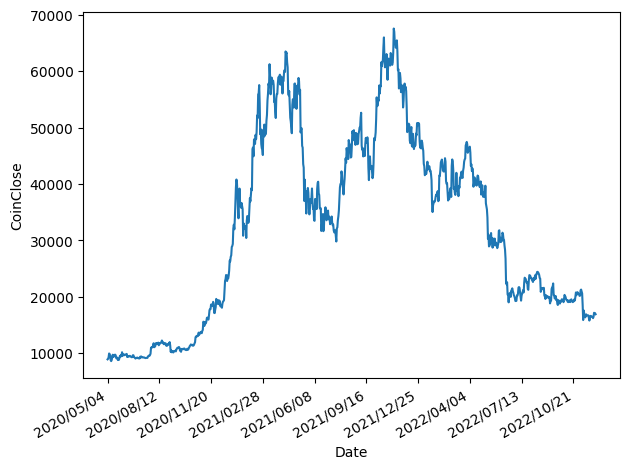

In [29]:
df=df.sort_values(by='id', ascending=False)
fig, ax = plt.subplots()

ax.plot(df['CoinDate'], df['CoinClose'])
ax.set_xlabel('Date')
ax.set_ylabel('CoinClose')

plt.xticks(range(0,943,100), ['2020/05/04','2020/08/12','2020/11/20','2021/02/28','2021/06/08','2021/09/16','2021/12/25','2022/04/04','2022/07/13','2022/10/21'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F01_peixeiro.png', dpi=300)

In [30]:
advanced_decomposition = STL(df['CoinClose'], period=4).fit()

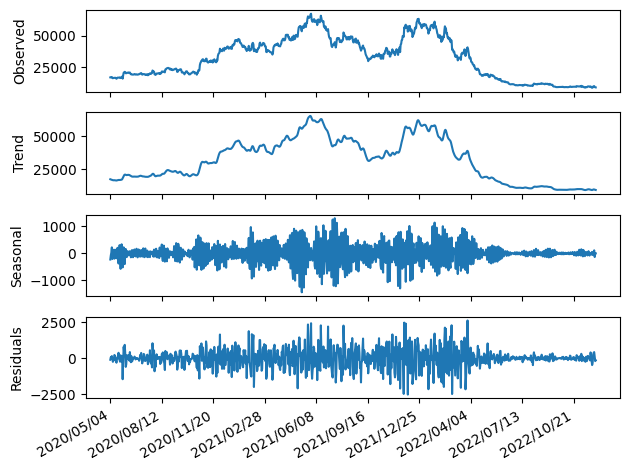

In [31]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(range(0,943,100), ['2020/05/04','2020/08/12','2020/11/20','2021/02/28','2021/06/08','2021/09/16','2021/12/25','2022/04/04','2022/07/13','2022/10/21'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F02_peixeiro.png', dpi=300)

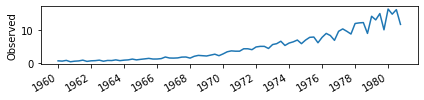

In [7]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.observed)
ax.set_ylabel('Observed')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F03_peixeiro.png', dpi=300)

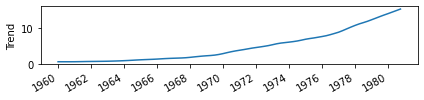

In [8]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.trend)
ax.set_ylabel('Trend')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F04_peixeiro.png', dpi=300)

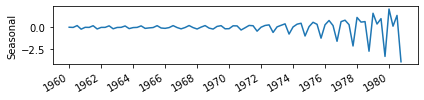

In [9]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.seasonal)
ax.set_ylabel('Seasonal')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F05_peixeiro.png', dpi=300)

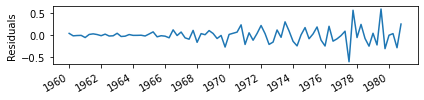

In [10]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.resid)
ax.set_ylabel('Residuals')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH01_F06_peixeiro.png', dpi=300)

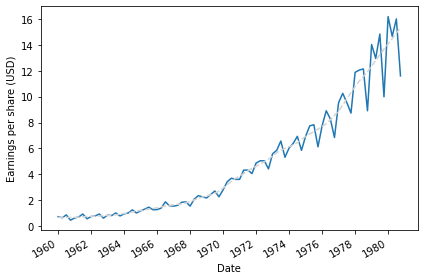

In [12]:
# fig, ax = plt.subplots()

# ax.plot(df.date, df.data)
# ax.plot(advanced_decomposition.trend, color='lightgrey', linestyle='--', label='Trend')
# ax.set_xlabel('Date')
# ax.set_ylabel('Earnings per share (USD)')

# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# fig.autofmt_xdate()
# plt.tight_layout()

# plt.savefig('figures/CH01_F01_peixeiro.png', dpi=300)